# Data Loading

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('train.csv')

In [76]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [78]:
df.nunique

<bound method DataFrame.nunique of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849       

In [79]:
#checking if there is missing rows
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Cleaning

In [81]:
df.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [82]:
df['Gender'].fillna('Female', inplace=True)

In [83]:
df.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [84]:
df['Married'].fillna('No',inplace=True)
df['Dependents'].fillna(df['Dependents'].mode(),inplace=True)

In [85]:
df.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [86]:
df['Self_Employed'].fillna('Yes',inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [87]:
df.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [88]:
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)
df['Dependents'].fillna('0',inplace=True)

In [89]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [90]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Exploratory Analysis

## Loan Status

In [91]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

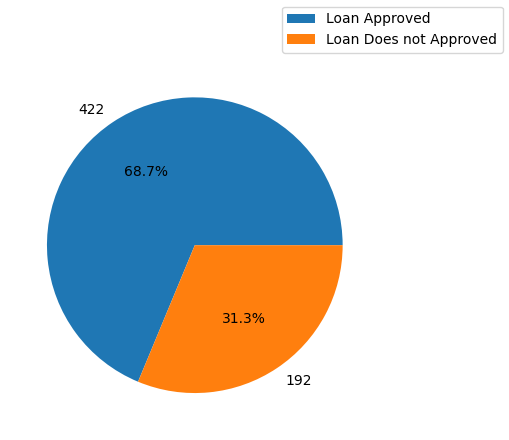

In [92]:
status_count = df['Loan_Status'].value_counts()
plt.pie(status_count,labels=status_count,autopct='%1.1f%%')
plt.figlegend(['Loan Approved','Loan Does not Approved']);

### Relationship between Property area and Loan Status

In [94]:
pd.crosstab(df['Property_Area'], df['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


(array([0, 1, 2]),
 [Text(0, 0, 'Rural'), Text(1, 0, 'Semiurban'), Text(2, 0, 'Urban')])

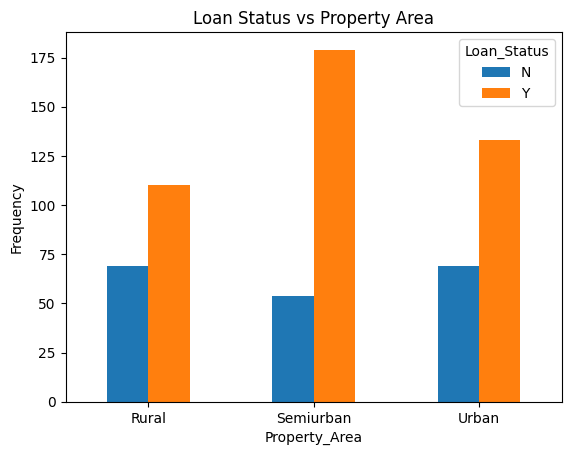

In [96]:
pd.crosstab(df['Property_Area'],df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Loan Status vs Property Area')
plt.xticks(rotation=0)

### Applicant Income Distribution 

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

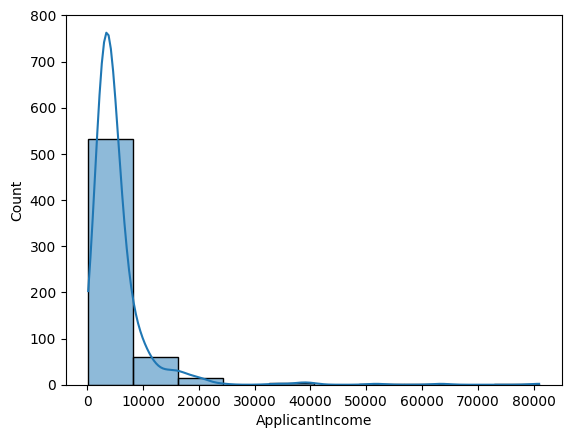

In [97]:
sns.histplot(df['ApplicantIncome'],bins=10,kde=True)

In [99]:
pd.crosstab(df['Credit_History'],df['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


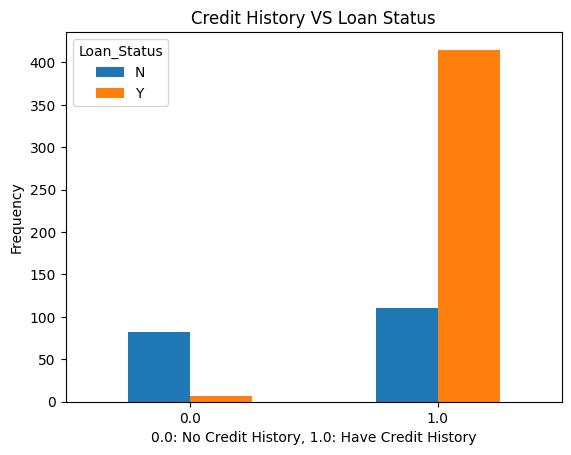

In [100]:
pd.crosstab(df['Credit_History'], df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('0.0: No Credit History, 1.0: Have Credit History')
plt.title('Credit History VS Loan Status')
plt.xticks(rotation=0);

## Correlation Analysis

In [101]:
from sklearn.preprocessing import LabelEncoder
df.drop('Loan_ID',axis=1, inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [102]:
le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
    print(f'{col}: {df[col].unique()}')

Gender: [1 0]
Married: [0 1]
Dependents: [0 1 2 3]
Education: [0 1]
Self_Employed: [0 1]
Property_Area: [2 0 1]
Loan_Status: [1 0]


In [103]:
corr_matrix = df.corr().round(2)
corr_matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.34,0.15,0.06,-0.04,0.01,0.08,0.06,-0.07,0.02,-0.02,0.03
Married,0.34,1.00,0.34,0.02,-0.02,0.05,0.08,0.15,-0.10,0.01,0.00,0.08
Dependents,0.15,0.34,1.00,0.06,0.04,0.12,0.03,0.16,-0.10,-0.04,-0.00,0.01
Education,0.06,0.02,0.06,1.00,-0.02,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09
Self_Employed,-0.04,-0.02,0.04,-0.02,1.00,0.12,0.03,0.11,-0.04,0.04,-0.02,0.01
ApplicantIncome,0.01,0.05,0.12,-0.14,0.12,1.00,-0.12,0.57,-0.05,-0.02,-0.01,-0.00
CoapplicantIncome,0.08,0.08,0.03,-0.06,0.03,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06
LoanAmount,0.06,0.15,0.16,-0.17,0.11,0.57,0.19,1.00,0.04,-0.00,-0.05,-0.03
Loan_Amount_Term,-0.07,-0.10,-0.10,-0.07,-0.04,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02
Credit_History,0.02,0.01,-0.04,-0.07,0.04,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54


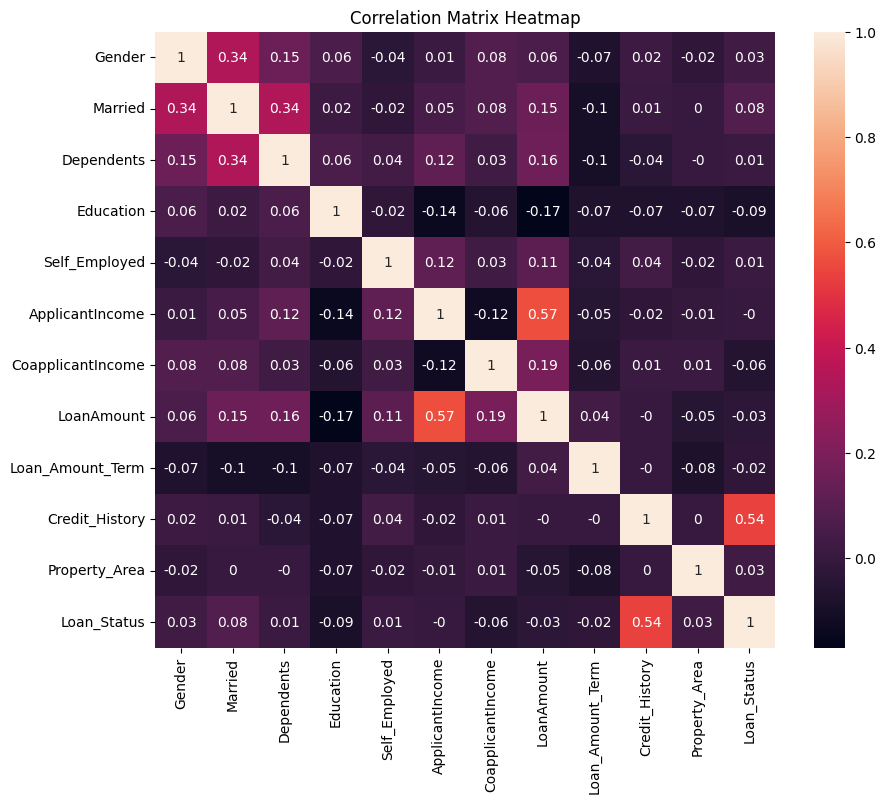

In [104]:
## plot corr matrix into heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix Heatmap');

## Modelling

In [105]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix

# split X(features) and y(target)
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

#Split train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)

model = RidgeClassifierCV()


In [106]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.806910569105691

In [107]:
y_preds = model.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [108]:
model._predict_proba_lr(X_test)[:5]


array([[0.39085339, 0.60914661],
       [0.37742785, 0.62257215],
       [0.32937238, 0.67062762],
       [0.43239388, 0.56760612],
       [0.45851229, 0.54148771]])

In [109]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59       156
           1       0.79      0.98      0.87       336

    accuracy                           0.81       492
   macro avg       0.84      0.71      0.73       492
weighted avg       0.82      0.81      0.78       492



## Tuning Hyperparameter by GridSearchCV

In [110]:
model.get_params()

{'alphas': (0.1, 1.0, 10.0),
 'class_weight': None,
 'cv': None,
 'fit_intercept': True,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

In [111]:
gs_params = {
    'alphas':[0.1,1.0,10.0]
}

gs_model = GridSearchCV(estimator=RidgeClassifierCV(),
                        param_grid=gs_params,
                        n_jobs=1,
                        verbose=3
                       )

gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ........................alphas=0.1;, score=0.880 total time=   0.0s
[CV 2/5] END ........................alphas=0.1;, score=0.880 total time=   0.0s
[CV 3/5] END ........................alphas=0.1;, score=0.667 total time=   0.0s
[CV 4/5] END ........................alphas=0.1;, score=0.792 total time=   0.0s
[CV 5/5] END ........................alphas=0.1;, score=0.750 total time=   0.0s
[CV 1/5] END ........................alphas=1.0;, score=0.880 total time=   0.0s
[CV 2/5] END ........................alphas=1.0;, score=0.880 total time=   0.0s
[CV 3/5] END ........................alphas=1.0;, score=0.667 total time=   0.0s
[CV 4/5] END ........................alphas=1.0;, score=0.792 total time=   0.0s
[CV 5/5] END ........................alphas=1.0;, score=0.750 total time=   0.0s
[CV 1/5] END .......................alphas=10.0;, score=0.840 total time=   0.0s
[CV 2/5] END .......................alphas=10.0;,

GridSearchCV(estimator=RidgeClassifierCV(), n_jobs=1,
             param_grid={'alphas': [0.1, 1.0, 10.0]}, verbose=3)

In [112]:
# best hyperparameter
gs_model.best_params_

{'alphas': 0.1}

In [113]:
np.random.seed(42)
best_model = RidgeClassifierCV(alphas=0.1)

best_model.fit(X_train,y_train)

RidgeClassifierCV(alphas=0.1)

In [114]:
# train score
best_model.score(X_train,y_train)

0.8278688524590164

In [115]:
# test score
best_model.score(X_test,y_test)

0.806910569105691

In [116]:
y_preds = best_model.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [117]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.90      0.44      0.59       156
           1       0.79      0.98      0.87       336

    accuracy                           0.81       492
   macro avg       0.84      0.71      0.73       492
weighted avg       0.82      0.81      0.78       492



In [118]:
acc = accuracy_score(y_test,y_preds)
f1 = f1_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)
precision = precision_score(y_test,y_preds)

score_metrics = pd.DataFrame({
    'Accuracy':acc,
    'F1':f1,
    'Recall':recall,
    'Precision':precision
},index=['Value'])

score_metrics

,Accuracy,F1,Recall,Precision
Value,0.806911,0.873502,0.97619,0.790361


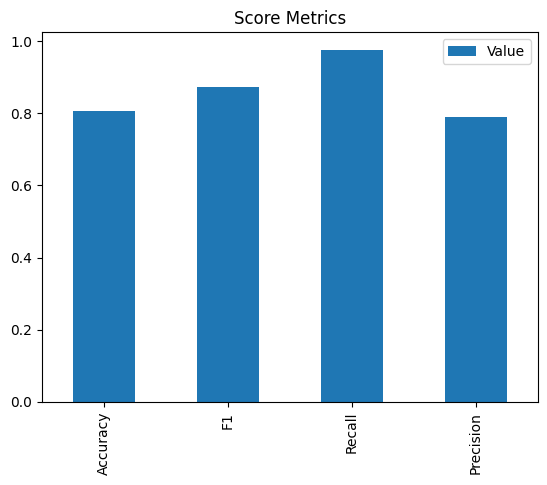

In [119]:
score_metrics.T.plot(kind='bar')
plt.title('Score Metrics');

In [120]:
conf_matrix = confusion_matrix(y_test,y_preds)
conf_matrix

array([[ 69,  87],
       [  8, 328]], dtype=int64)

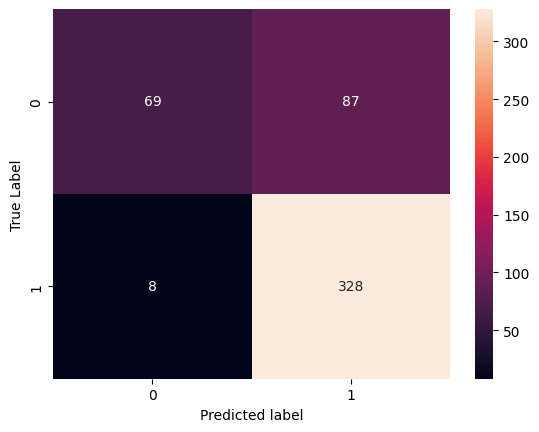

In [121]:
sns.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True Label');